In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [ ]:
# t검정은 차이가 있냐 없냐를 검정
# 회귀분석은 X의 변화와 y의 변화의 상관관계가 있냐 없냐를 검정

# 차이가 없고, 상관관계가 없음이 귀무가설
# 차이가 있고, 상관관계가 있음이 대립가설

In [3]:
x = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.48, 3.71, 4.61, 3.90, 2.53]
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.46, 3.05, 3.18, 3.25, 2.67, 2.53]

result = stats.linregress(x,y)
result

# rvalue는 상관계수로, 1에 가까울수록 좋은 데이터

LinregressResult(slope=0.4011337949840335, intercept=1.32235824572734, rvalue=0.7741372806832324, pvalue=0.0031231313139400653, stderr=0.10372588691070943, intercept_stderr=0.40044797833874435)

In [4]:
slope, intercept, r_value, p_value, stderr = stats.linregress(x,y)

Text(0, 0.5, '전기사용량')

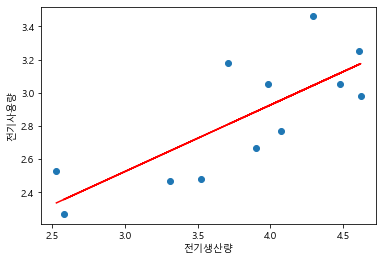

In [7]:
x1 = np.array(x)
plt.scatter(x,y)
plt.plot(x1, slope*x1+intercept, c="red")
plt.xlabel("전기생산량")
plt.ylabel("전기사용량")

In [8]:
4 * slope + intercept

2.926893425663474

In [10]:
from math import sqrt
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

def independent_test(data1, data2, alpha):
    mean1, mean2 = data2
    se1, se2 = sem(data1), sem(data2)
    sed = sqrt(se1**2 + se2 **2)
    t_stat = (mean1 - mean2) / sed
    p = (1.0 - t.cdf(abs(t_stat), df))* 2.0
    return t_stat, p

# 이건 머.. 그냥 해보는거


In [13]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples = 50, n_features = 1, bias = 100, noise = 10, random_state = 0, coef = True
)

print(X[:5].flatten()) # flatten()은 2차원 배열을 1차원 배열로 변환해서 보여주는 함수
print(y[:5])
print(w)

[-0.85409574  1.49407907 -0.34791215  0.44386323 -0.18718385]
[ 69.16576208 129.94932345  80.01389923 100.30585701 107.20314663]
15.896958364551972


In [14]:
import numpy as np
xx = np.linspace(-3, 3, 100) # -3에서 3까지 100등분
y0 = w * xx + 100 # 회귀함수로 기울기*x + 절편

Text(0.5, 1.0, 'regression')

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


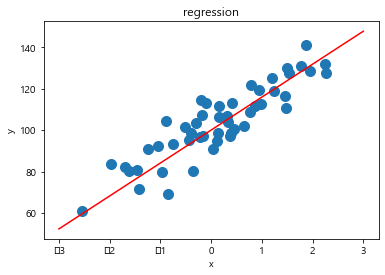

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression")

# y의 표준편차은 noise 값을 크게 만들면 scatter에서 볼 수 있듯이 값들이 넓게 분산되는 것

In [16]:
from sklearn.datasets import make_regression

bias = 100
X, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)

print(X[:5])
print(y[:5])
print(w)

[[ 0.23249456]
 [-0.03869551]
 [ 0.5505375 ]
 [ 0.50318481]
 [ 2.18697965]]
[127.87901739  93.03291422 161.8575084  141.69205026 283.26011945]
86.44794300545998


In [17]:
from sklearn.linear_model import LinearRegression

# sklearn의 회귀분석 보형 함수 fit(X,y)

model = LinearRegression().fit(X,y)
print(model.intercept_, model.coef_) # 절편과 기울기 확인

99.79150868986945 [86.96171201]


In [18]:
# 회귀분석 모델에 새로운 값을 입력하여 예측한 것을 2차원 배열로 입력

model.predict([[-2], [-1], [0], [1], [2]])

array([-74.13191534,  12.82979668,  99.79150869, 186.7532207 ,
       273.71493272])

In [19]:
print(X[:5])
print(y[:5])

[[ 0.23249456]
 [-0.03869551]
 [ 0.5505375 ]
 [ 0.50318481]
 [ 2.18697965]]
[127.87901739  93.03291422 161.8575084  141.69205026 283.26011945]


In [20]:
import pandas as pd
df = pd.DataFrame({'x':X.flatten(), 'y':y})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [21]:
import statsmodels.api as sm

X = df[["x"]]
y = df[["y"]]

# 최소자승법 : 오차의 제곱의 합을 최소로 만드는 법
# OLS() : 최소자승법 함수

model = sm.OLS(y, X)
result = model.fit()
result.summary()

# R-squared 값이 1에 가까울수록 좋은 데이터

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.457
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              167.2
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                    3.66e-28
Time:                        11:48:51   Log-Likelihood:                         -1204.0
No. Observations:                 200   AIC:                                      2410.
Df Residuals:                     199   BIC:                                      2413.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x             99.6428      7.706     12.931      0.000      84.448     114.838
==============================================================================
Omnibus:                        0.691   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.415
Skew:                           0.079   Prob(JB):                        0.813
Kurtosis:                       3.158   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# 위에 만든 최소자승법 함수에 예상값 넣기(1차원 배열로 넣어야함)

result.predict([-2, -1, 0, 1, 2])

array([-199.28565959,  -99.64282979,    0.        ,   99.64282979,
        199.28565959])

In [23]:
result.params

x    99.64283
dtype: float64

In [24]:
result.resid

0      104.712602
1       96.888644
2      107.000394
3       91.553292
4       65.343279
          ...    
195    105.055511
196    105.871796
197     70.418046
198     99.984395
199    100.673331
Length: 200, dtype: float64

Text(0, 0.5, 'Residual')

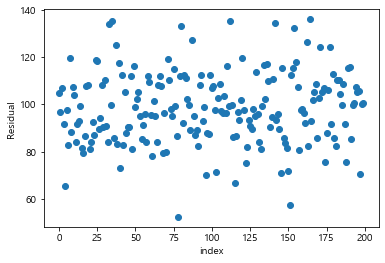

In [25]:
%matplotlib inline
result.resid.plot(style="o")
plt.xlabel("index")
plt.ylabel("Residual")

In [ ]:
# 회귀분석에서는 pvalue 보다는 rvalue가 더 중요함
# 그것을 알아보자!!

In [26]:
X, y, coef = make_regression(n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX = pd.DataFrame(X, columns=["X"])
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

# ("종속변수 ~ 독립변수")
model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()
result.predict(dfX)

0    -17.934714
1     39.638175
2     14.893262
3    -37.478808
4    -40.694820
        ...    
95   -52.645684
96   -18.072076
97    12.912314
98   -71.981016
99   -53.312776
Length: 100, dtype: float64

In [27]:
print("종속변수 y의 분산(TTS) : ", result.uncentered_tss)
print("예측값의 분산(ESS) : ", result.mse_model)
print("잔차의 분산(RSS) : ", result.ssr)
print("R squared = ", result.rsquared)

# rvalue = 결정계수
# rvalue 나오는 과정이 이렇다는 거!

종속변수 y의 분산(TTS) :  291345.75789830607
예측값의 분산(ESS) :  188589.61349210917
잔차의 분산(RSS) :  102754.33755137533
R squared =  0.6473091780922586


In [28]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           6.60e-24
Time:                        12:05:54   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

In [ ]:
# 회귀분석에서 중요한 건 모델을 만드는 방법과 해석하는 것

In [29]:
df = pd.read_csv("c:/data/ozone/ozone.csv")
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [30]:
# 결측값 제거

df2 = df.dropna(axis=0)
df2.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7


In [31]:
x2 = df2["Temp"].values # 독립변수, 화씨온도
print(x2)
y2 = df2["Ozone"].values # 종속변수, 오존량 - 우리가 구하고자 하는 것
print(y2)

[67 72 74 62 65 59 61 69 66 68 58 64 66 57 68 62 59 73 61 61 67 81 79 76
 82 90 87 82 77 72 65 73 76 84 85 81 83 83 88 92 92 89 73 81 80 81 82 84
 87 85 74 86 85 82 86 88 86 83 81 81 81 82 89 90 90 86 82 80 77 79 76 78
 78 77 72 79 81 86 97 94 96 94 91 92 93 93 87 84 80 78 75 73 81 76 77 71
 71 78 67 76 68 82 64 71 81 69 63 70 75 76 68]
[ 41.  36.  12.  18.  23.  19.   8.  16.  11.  14.  18.  14.  34.   6.
  30.  11.   1.  11.   4.  32.  23.  45. 115.  37.  29.  71.  39.  23.
  21.  37.  20.  12.  13. 135.  49.  32.  64.  40.  77.  97.  97.  85.
  10.  27.   7.  48.  35.  61.  79.  63.  16.  80. 108.  20.  52.  82.
  50.  64.  59.  39.   9.  16. 122.  89. 110.  44.  28.  65.  22.  59.
  23.  31.  44.  21.   9.  45. 168.  73.  76. 118.  84.  85.  96.  78.
  73.  91.  47.  32.  20.  23.  21.  24.  44.  21.  28.   9.  13.  46.
  18.  13.  24.  16.  13.  23.  36.   7.  14.  30.  14.  18.  20.]


In [32]:
result = stats.linregress(x2, y2) # 결측값이 있으면 이게 안 나옴
result

LinregressResult(slope=2.439109905529362, intercept=-147.64607238059494, rvalue=0.6985414096486389, pvalue=1.552677229392932e-17, stderr=0.23931937849409174, intercept_stderr=18.755251765306646)

Text(0, 0.5, '오존량')

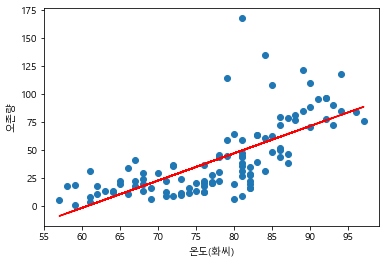

In [33]:
slope, intercept, r_value, p_value, stderr = stats.linregress(x2, y2)
plt.scatter(x2, y2)
plt.plot(x2, slope*x2 + intercept, c="red")
plt.xlabel("온도(화씨)")
plt.ylabel("오존량")

In [34]:
# 온도가 화씨 80도일 때 오존량 예측
# 독립변수 화씨 80에 기울기 곱하고 절편 더하기

80 * slope + intercept

47.48272006175401